In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('HRDB_DATA.csv')

# EDA 
- Identify missing values and handle them appropriately.
- Perform summary statistics and visualize data distributions.
- Identify potential correlations between features that may contribute to
attrition.

In [2]:
df.shape

(1470, 35)

In [3]:
df.info()
#אין ערכים חסרים בטבלה!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   EnvironmentSatisfaction   1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   HourlyRate                1470 non-null   int64 
 4   JobInvolvement            1470 non-null   int64 
 5   JobLevel                  1470 non-null   int64 
 6   JobRole                   1470 non-null   object
 7   JobSatisfaction           1470 non-null   int64 
 8   MaritalStatus             1470 non-null   object
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  Over18                    1470 non-null   object
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

In [4]:
#בדיקה כמה ערכים "יוניקים" יש בטבלה
df.nunique(axis=0)

EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department

In [5]:
#סטטיסטיקה תיאורית
df.describe()

,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DailyRate,DistanceFromHome,Education,EmployeeCount
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0
mean,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,...,2.761224,7.008163,4.229252,2.187755,4.123129,36.923810,802.485714,9.192517,2.912925,1.0
std,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,...,0.706476,6.126525,3.623137,3.222430,3.568136,9.135373,403.509100,8.106864,1.024165,0.0
min,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,102.000000,1.000000,1.000000,1.0
25%,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,...,2.000000,3.000000,2.000000,0.000000,2.000000,30.000000,465.000000,2.000000,2.000000,1.0
50%,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,...,3.000000,5.000000,3.000000,1.000000,3.000000,36.000000,802.000000,7.000000,3.000000,1.0
75%,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,...,3.000000,9.000000,7.000000,3.000000,7.000000,43.000000,1157.000000,14.000000,4.000000,1.0
max,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,...,4.000000,40.000000,18.000000,15.000000,17.000000,60.000000,1499.000000,29.000000,5.000000,1.0


In [6]:
joined_table = pd.read_csv("HRDB_DATA.csv")
joined_table

,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,YearsWithCurrManager,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,5,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,7,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,0,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,0,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,2,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,...,3,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1
1466,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,...,7,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1
1467,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,...,3,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1
1468,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,...,8,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1


In [7]:
joined_table

,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,YearsWithCurrManager,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,5,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,7,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,0,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,0,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,2,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,...,3,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1
1466,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,...,7,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1
1467,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,...,3,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1
1468,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,...,8,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1


# Correlation Matrix
## Detailed Correlation Table
### Shows all corr values

In [8]:
correlation_matrix = joined_table.select_dtypes(include=['number']).corr()
correlation_matrix.round(2)

,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DailyRate,DistanceFromHome,Education,EmployeeCount
EmployeeNumber,1.00,0.02,0.04,-0.01,-0.02,-0.05,-0.01,0.01,-0.00,-0.01,...,0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.05,0.03,0.04,NaN
EnvironmentSatisfaction,0.02,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,...,0.03,0.00,0.02,0.02,-0.00,0.01,0.02,-0.02,-0.03,NaN
HourlyRate,0.04,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,...,-0.00,-0.02,-0.02,-0.03,-0.02,0.02,0.02,0.03,0.02,NaN
JobInvolvement,-0.01,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,...,-0.01,-0.02,0.01,-0.02,0.03,0.03,0.05,0.01,0.04,NaN
JobLevel,-0.02,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,...,0.04,0.53,0.39,0.35,0.38,0.51,0.00,0.01,0.10,NaN
JobSatisfaction,-0.05,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,0.00,-0.06,0.02,...,-0.02,-0.00,-0.00,-0.02,-0.03,-0.00,0.03,-0.00,-0.01,NaN
MonthlyIncome,-0.01,-0.01,-0.02,-0.02,0.95,-0.01,1.00,0.03,0.15,-0.03,...,0.03,0.51,0.36,0.34,0.34,0.50,0.01,-0.02,0.09,NaN
MonthlyRate,0.01,0.04,-0.02,-0.02,0.04,0.00,0.03,1.00,0.02,-0.01,...,0.01,-0.02,-0.01,0.00,-0.04,0.03,-0.03,0.03,-0.03,NaN
NumCompaniesWorked,-0.00,0.01,0.02,0.02,0.14,-0.06,0.15,0.02,1.00,-0.01,...,-0.01,-0.12,-0.09,-0.04,-0.11,0.30,0.04,-0.03,0.13,NaN
PercentSalaryHike,-0.01,-0.03,-0.01,-0.02,-0.03,0.02,-0.03,-0.01,-0.01,1.00,...,-0.00,-0.04,-0.00,-0.02,-0.01,0.00,0.02,0.04,-0.01,NaN


## Heatmap
### Filteres |corr|>0.5

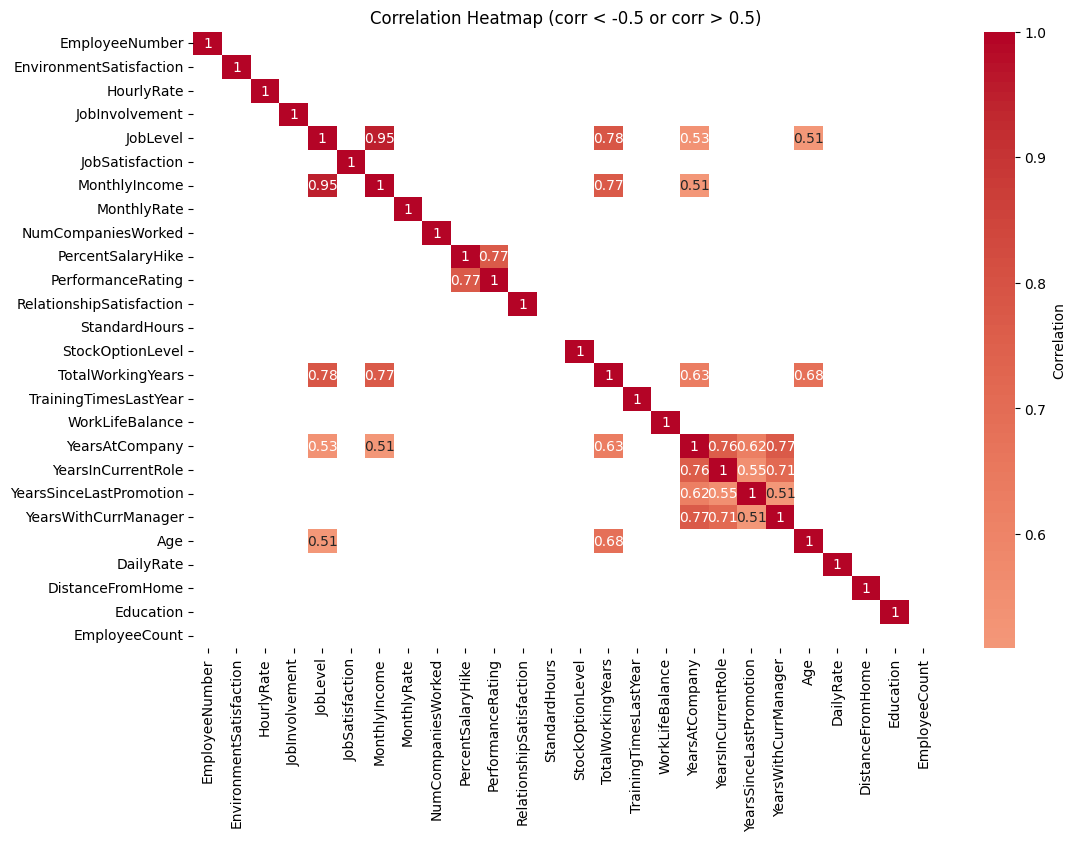

In [9]:
corr = joined_table.corr(numeric_only=True)
# Filter correlations: keep only corr > 0.5 or < -0.5 (diagonal will always be 1)
filtered_corr = corr[(corr > 0.5) | (corr < -0.5)]
plt.figure(figsize=(12,8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', center=0, mask=filtered_corr.isnull(), cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (corr < -0.5 or corr > 0.5)')
plt.show()

## Top Correlations
### Shows pairs of features with highest corr values (desc order)

In [1]:
# Get the correlation matrix, keeping only upper triangle (without diagonal)
corr_matrix = joined_table.corr(numeric_only=True)
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]

# Filter by correlation magnitude > 0.5
strong_corr = corr_pairs[(corr_pairs["Correlation"].abs() < -0.5)]

# Sort descending by absolute correlation value
strong_corr = strong_corr.reindex(
    strong_corr["Correlation"].abs().sort_values(ascending=False).index
)

# Filter by correlation magnitude > 0.5 or < -0.5
strong_corr = corr_pairs[(corr_pairs["Correlation"].abs() > 0.5)]
strong_corr.round(2)


NameError: name 'joined_table' is not defined


Attrition Rate by Age Group:
Age Group
18-24    39.18%
25-34    20.22%
35-44    10.10%
45-54    10.20%
55+      15.94%
Name: Attrition, dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_29392\908027306.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_age_group = joined_table.groupby('Age Group')['Attrition'].mean()


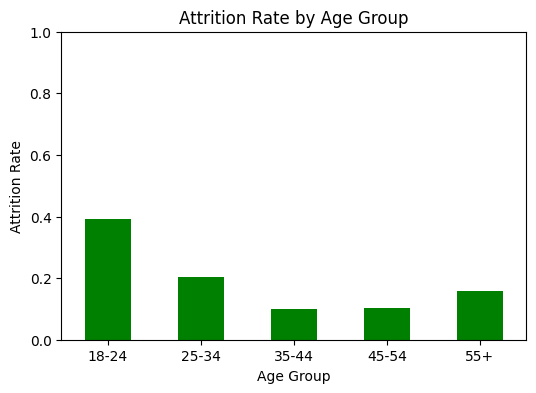

In [11]:
# If Attrition is encoded as 'Yes'/'No', convert it to 1/0:
if joined_table['Attrition'].dtype == object:
    joined_table['Attrition'] = joined_table['Attrition'].map({'Yes': 1, 'No': 0})

# Create age bins
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55+']
joined_table['Age Group'] = pd.cut(joined_table['Age'], bins=age_bins, labels=age_labels, right=False)

# Attrition rate by age group
attrition_by_age_group = joined_table.groupby('Age Group')['Attrition'].mean()
print("\nAttrition Rate by Age Group:")
print(attrition_by_age_group.apply(lambda x: f"{x:.2%}"))

plt.figure(figsize=(6,4))
attrition_by_age_group.plot(kind='bar', color='green')
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Age Group")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()



Attrition Rate by Department:
Department
Sales                     20.63%
Human Resources           19.05%
Research & Development    13.84%
Name: Attrition, dtype: object


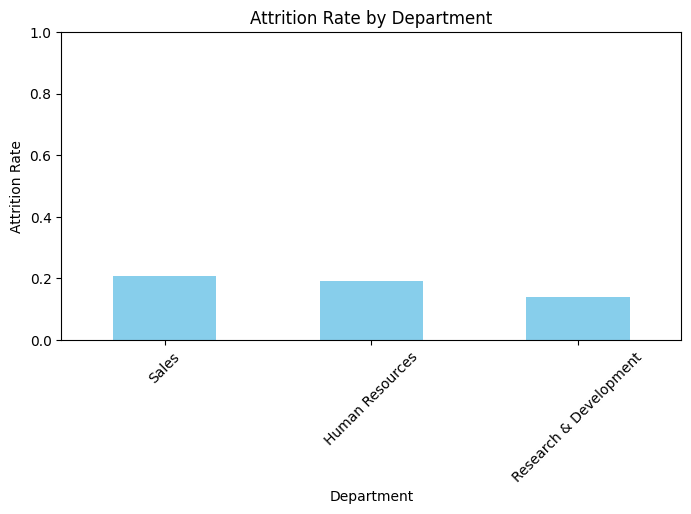

In [12]:
# Analyze attrition rate by department
attrition_by_dept = joined_table.groupby("Department")["Attrition"].mean().sort_values(ascending=False)
print("\nAttrition Rate by Department:")
print(attrition_by_dept.apply(lambda x: f"{x:.2%}"))
plt.figure(figsize=(8,4))
attrition_by_dept.plot(kind='bar', color='skyblue')
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Department")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()





Attrition Rate by Gender:
Gender
Male      17.01%
Female    14.80%
Name: Attrition, dtype: object


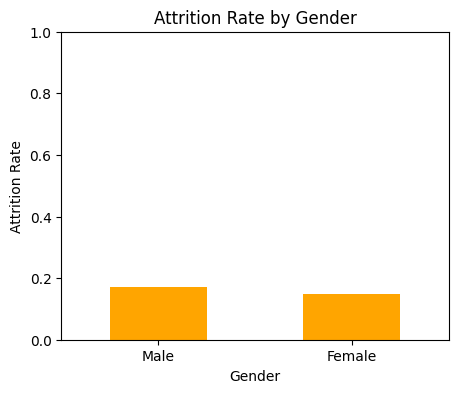

In [13]:

# Analyze attrition rate by gender
attrition_by_gender = joined_table.groupby("Gender")["Attrition"].mean().sort_values(ascending=False)
print("\nAttrition Rate by Gender:")
print(attrition_by_gender.apply(lambda x: f"{x:.2%}"))

plt.figure(figsize=(5,4))
attrition_by_gender.plot(kind='bar', color='orange')
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Gender")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

Summary Statistics for Job Levels 1, 2, 3, 4, 5:


C:\Users\User\AppData\Local\Temp\ipykernel_29392\2814841722.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = levels_df.groupby("JobLevel")[attributes_to_summarize].mean().round(2)


,HourlyRate,MonthlyIncome,YearsAtCompany,YearsSinceLastPromotion,TotalWorkingYears,Attrition Rate
JobLevel,,,,,,
1,66.76,2786.92,3.93,1.19,5.89,26.00%
2,65.77,5502.28,6.75,1.89,10.42,10.00%
3,64.19,9817.25,9.38,3.35,15.12,15.00%
4,65.68,15503.78,13.89,4.84,25.47,5.00%
5,65.72,19191.83,15.13,4.59,26.38,7.00%


C:\Users\User\AppData\Local\Temp\ipykernel_29392\2814841722.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = levels_df.groupby("JobLevel")[attr].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_29392\2814841722.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = levels_df.groupby("JobLevel")[attr].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_29392\2814841722.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

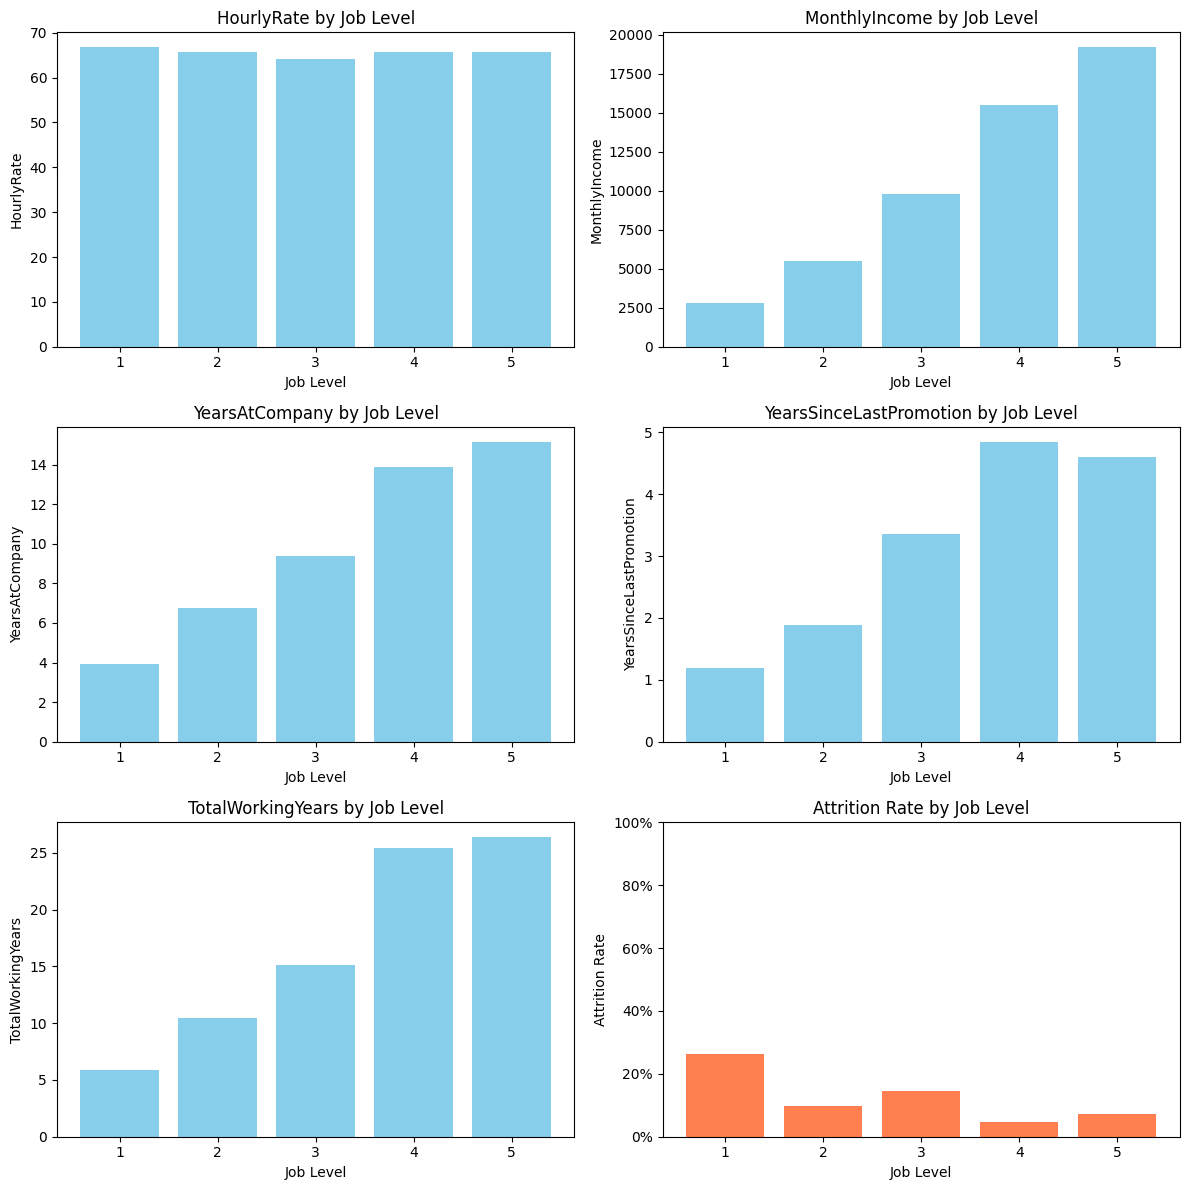

In [14]:
# Comparison of Job Levels 1, 2, 3, 4, 5 on Key Specifications and Attributes

# Filter data for job levels 1, 2, 3, 4, and 5
selected_levels = [1, 2, 3, 4, 5]
levels_df = joined_table[joined_table["JobLevel"].isin(selected_levels)].copy()

# Set the display order for Job Levels
levels_df["JobLevel"] = levels_df["JobLevel"].astype("category")
levels_df["JobLevel"] = levels_df["JobLevel"].cat.set_categories(selected_levels, ordered=True)

# 1. Summary Table: Mean of Key Numeric Attributes
attributes_to_summarize = [
    "HourlyRate", "MonthlyIncome", "YearsAtCompany", 
    "YearsSinceLastPromotion", "TotalWorkingYears", "Attrition"
]
summary_table = levels_df.groupby("JobLevel")[attributes_to_summarize].mean().round(2)
summary_table.rename(columns={"Attrition": "Attrition Rate"}, inplace=True)
summary_table["Attrition Rate"] = summary_table["Attrition Rate"].apply(lambda x: f"{x:.2%}")

print("Summary Statistics for Job Levels 1, 2, 3, 4, 5:")
display(summary_table)

# 2. Bar Plots: Compare Means of Key Numeric Attributes
import matplotlib.pyplot as plt

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
ax = axs.flatten()

for idx, attr in enumerate(attributes_to_summarize):
    # Special formatting for Attrition (rate, not average raw value)
    if attr == "Attrition":
        data = levels_df.groupby("JobLevel")[attr].mean()
        ax[idx].bar(data.index.astype(str), data.values, color='coral')
        ax[idx].set_ylabel("Attrition Rate")
        ax[idx].set_title("Attrition Rate by Job Level")
        ax[idx].set_ylim(0, 1)
        ax[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(100 * y)))
    else:
        data = levels_df.groupby("JobLevel")[attr].mean()
        ax[idx].bar(data.index.astype(str), data.values, color='skyblue')
        ax[idx].set_ylabel(attr)
        ax[idx].set_title(f"{attr} by Job Level")
    ax[idx].set_xlabel("Job Level")

plt.tight_layout()
plt.show()

# 3. Categorical Attribute Distribution: Job Role by Level
ct_jobrole = pd.crosstab(levels_df["JobRole"], levels_df["JobLevel"])

# Normalize by columns to get the fraction within each job level
ct_jobrole_pct = ct_jobrole.div(ct_jobrole.sum(axis=0), axis=1).round(3)